In [1]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split

import wrangle

In [16]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# Exercises

In [2]:
df = wrangle.get_zillow_data()

Found CSV


In [3]:
df.head()

,bedrooms,bathrooms,sqft,tax_value,year_built,tax_amount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0


In [4]:
df = wrangle.wrangle_zillow(df)

In [5]:
df.head()

,bedrooms,bathrooms,sqft,tax_value,year_built,tax_amount,county
4,4,2.0,3633,296425,2005,6941.39,la
6,3,4.0,1620,847770,2011,10244.94,la
7,3,2.0,2077,646760,1926,7924.68,la
18,3,1.0,1244,169471,1950,2532.88,la
19,3,2.0,1300,233266,1950,3110.99,la


In [6]:
train, validate, test = wrangle.split_function(df)

In [12]:
print(f'df shape: {df.shape}')
print(f'train shape: {train.shape}')
print(f'validate shape: {validate.shape}')
print(f'test shape: {test.shape}')

df shape: (2010708, 7)
train shape: (1206424, 7)
validate shape: (402142, 7)
test shape: (402142, 7)


#### Do your work for these exercises in a jupyter notebook named scaling. Use the zillow dataset you acquired and prepped in previous lesson. Once you are finished, you may wish to repeat the exercises on another dataset for additional practice.

#### 1. Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution .

In [13]:
to_scale = ['bedrooms', 'bathrooms', 'sqft', 'year_built', 'tax_amount']

In [18]:
def visualize_scale(scaler, df, columns_to_scale, bins=10):
    #subplot
    fig, axs = plt.subplots(len(columns_to_scale), 2, figsize=(12,12))
    
    #copy df to scale
    df_scaled = df.copy()
    
    #fit_transform df
    df_scaled[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
    
    #plot original data with scaled data
    for (ax1, ax2), col in zip(axs, columns_to_scale):
        ax1.hist(df[col], bins=bins)
        ax1.set(title=f'{col} before scaling', xlabel=col, ylabel='count')
        ax2.hist(df_scaled[col], bins=bins)
        ax2.set(title=f'{col} after scaling with {scaler.__class__.__name__}', xlabel=col, ylabel='count')
    plt.tight_layout()

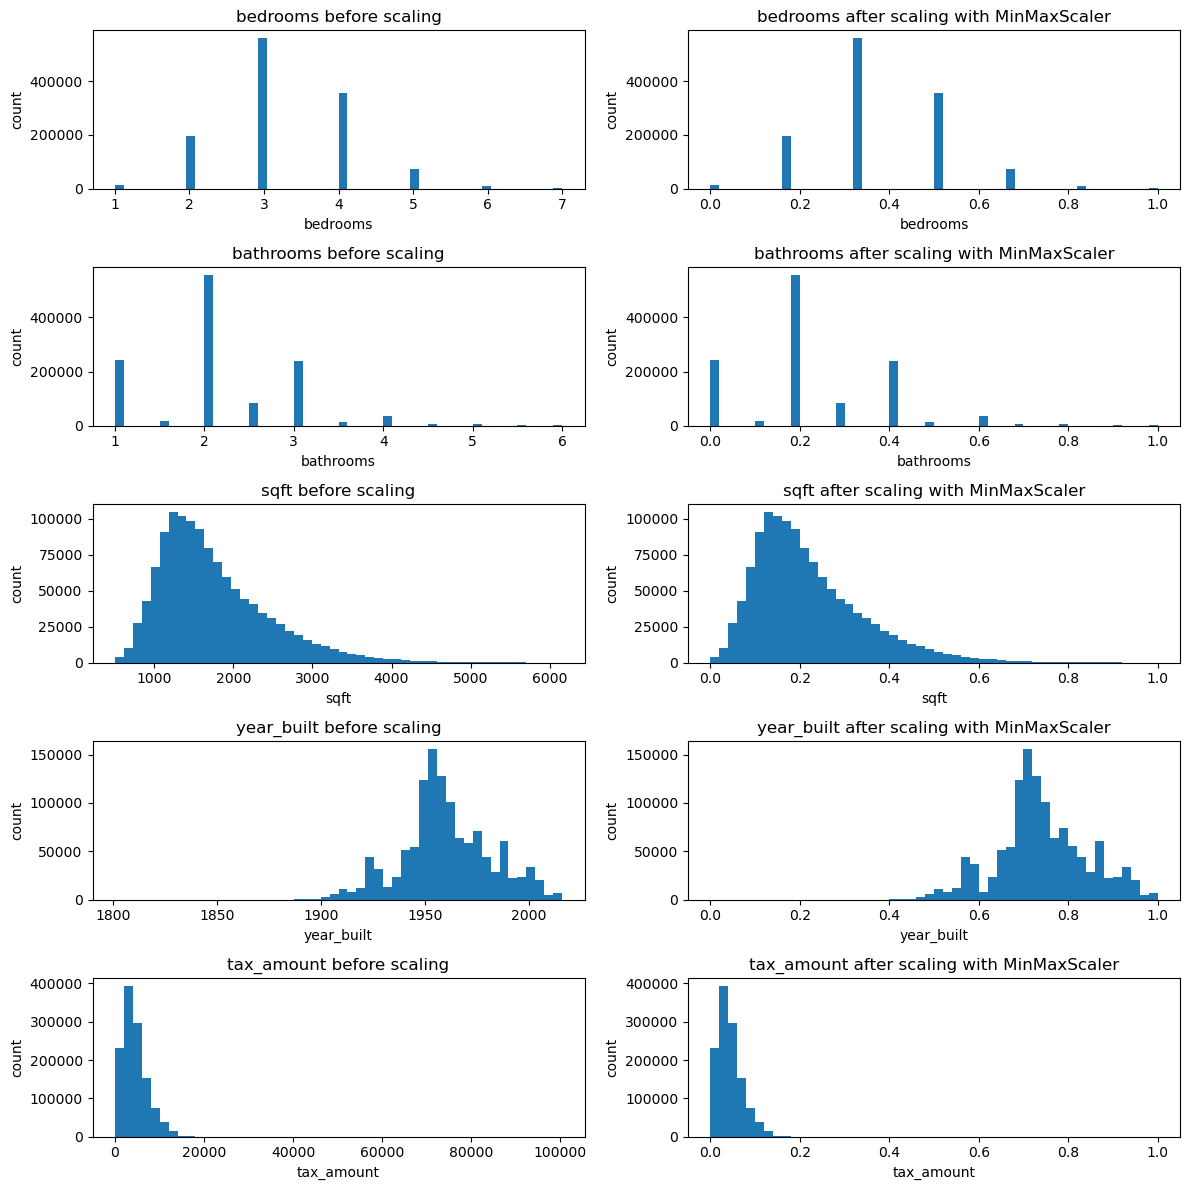

In [19]:
visualize_scale(scaler=MinMaxScaler(),
               df=train,
                columns_to_scale=to_scale,
                bins=50
               )

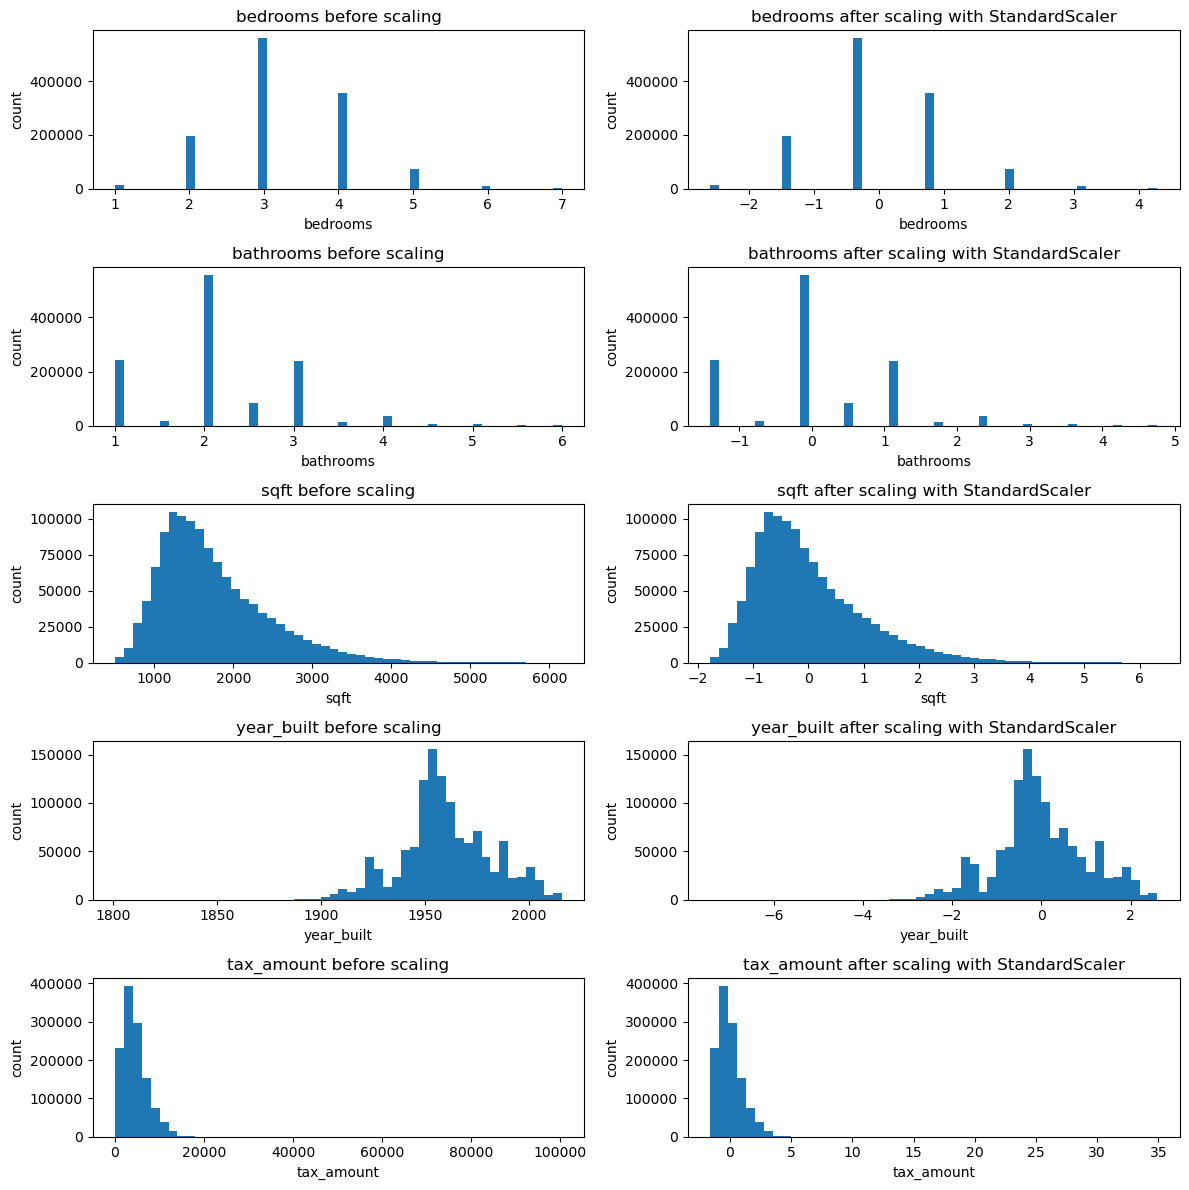

In [20]:
visualize_scale(scaler=StandardScaler(),
               df=train,
                columns_to_scale=to_scale,
                bins=50
               )

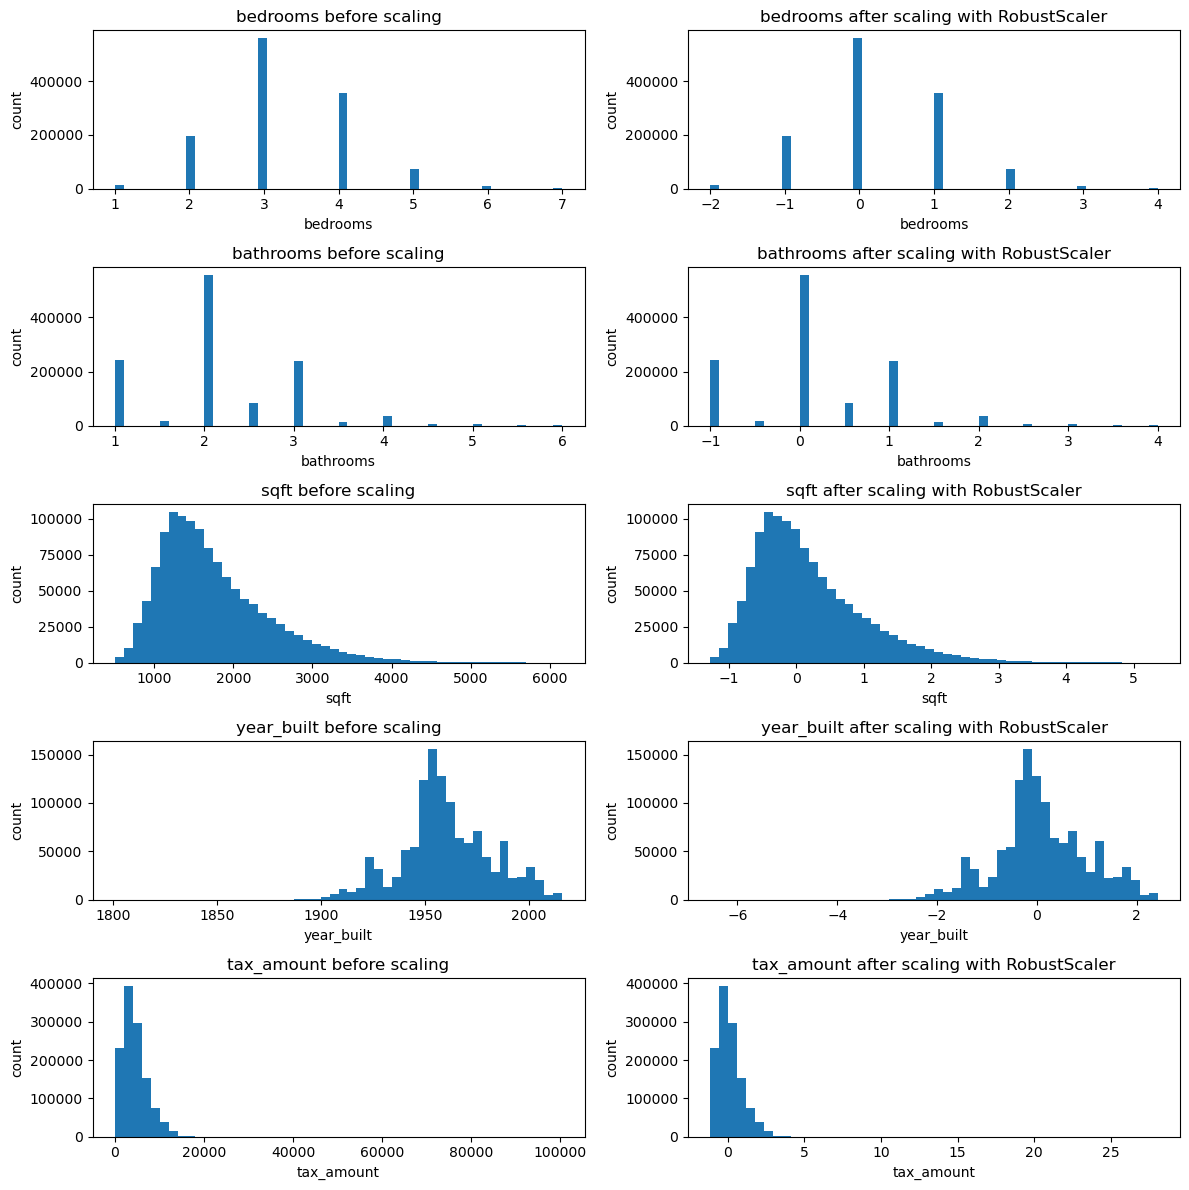

In [21]:
visualize_scale(scaler=RobustScaler(),
               df=train,
                columns_to_scale=to_scale,
                bins=50
               )

#### 2. Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

In [22]:
train[to_scale].head()

,bedrooms,bathrooms,sqft,year_built,tax_amount
1752514,3,1.5,1179,1957,2022.20
1400740,3,2.0,1663,1952,5603.99
1278943,3,2.0,1133,1963,2514.38
1105547,3,3.0,2562,1969,6375.61
355207,4,2.0,2747,1935,8411.60


In [23]:
# Make the thing
scaler = MinMaxScaler()

# fit the thing
train_scaled = scaler.fit_transform(train[to_scale])

# make df
train_scaled = pd.DataFrame(train_scaled, columns=to_scale)

In [24]:
train_scaled.head()

,bedrooms,bathrooms,sqft,year_built,tax_amount
0,0.333333,0.1,0.119986,0.725581,0.019948
1,0.333333,0.2,0.205513,0.702326,0.055638
2,0.333333,0.2,0.111857,0.753488,0.024852
3,0.333333,0.4,0.364375,0.781395,0.063326
4,0.500000,0.2,0.397067,0.623256,0.083613


In [25]:
inverse_train_scaled = scaler.inverse_transform(train_scaled)
inverse_train_scaled

array([[3.00000e+00, 1.50000e+00, 1.17900e+03, 1.95700e+03, 2.02220e+03],
       [3.00000e+00, 2.00000e+00, 1.66300e+03, 1.95200e+03, 5.60399e+03],
       [3.00000e+00, 2.00000e+00, 1.13300e+03, 1.96300e+03, 2.51438e+03],
       ...,
       [4.00000e+00, 4.00000e+00, 2.70100e+03, 2.00200e+03, 5.53155e+03],
       [3.00000e+00, 2.00000e+00, 1.48200e+03, 1.97900e+03, 1.29853e+03],
       [3.00000e+00, 2.00000e+00, 1.93600e+03, 1.96700e+03, 1.00130e+03]])

In [26]:
pd.DataFrame(inverse_train_scaled, columns=to_scale)

,bedrooms,bathrooms,sqft,year_built,tax_amount
0,3.0,1.5,1179.0,1957.0,2022.20
1,3.0,2.0,1663.0,1952.0,5603.99
2,3.0,2.0,1133.0,1963.0,2514.38
3,3.0,3.0,2562.0,1969.0,6375.61
4,4.0,2.0,2747.0,1935.0,8411.60
...,...,...,...,...,...
1206419,4.0,2.5,2738.0,2001.0,7060.90
1206420,3.0,3.0,1940.0,1955.0,20002.95
1206421,4.0,4.0,2701.0,2002.0,5531.55
1206422,3.0,2.0,1482.0,1979.0,1298.53


- ***It appears to return the original data frame with different dtypes***

#### 3. Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

In [27]:
from sklearn.preprocessing import QuantileTransformer

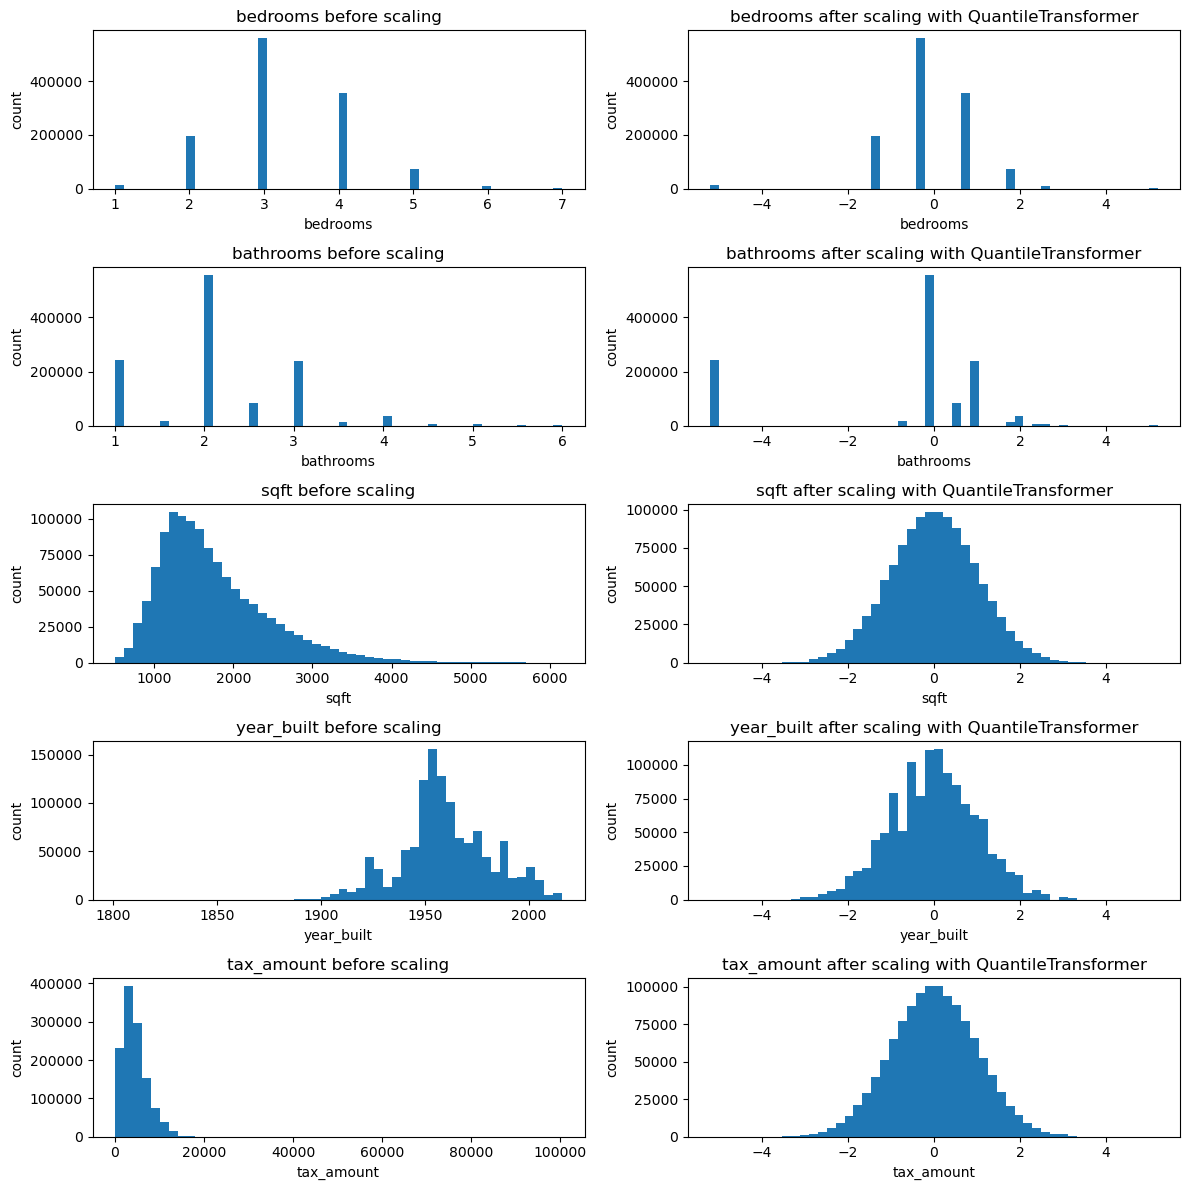

In [29]:
visualize_scale(scaler=QuantileTransformer(output_distribution='normal'),
               df=train,
                columns_to_scale=to_scale,
                bins=50
               )

#### 4. Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

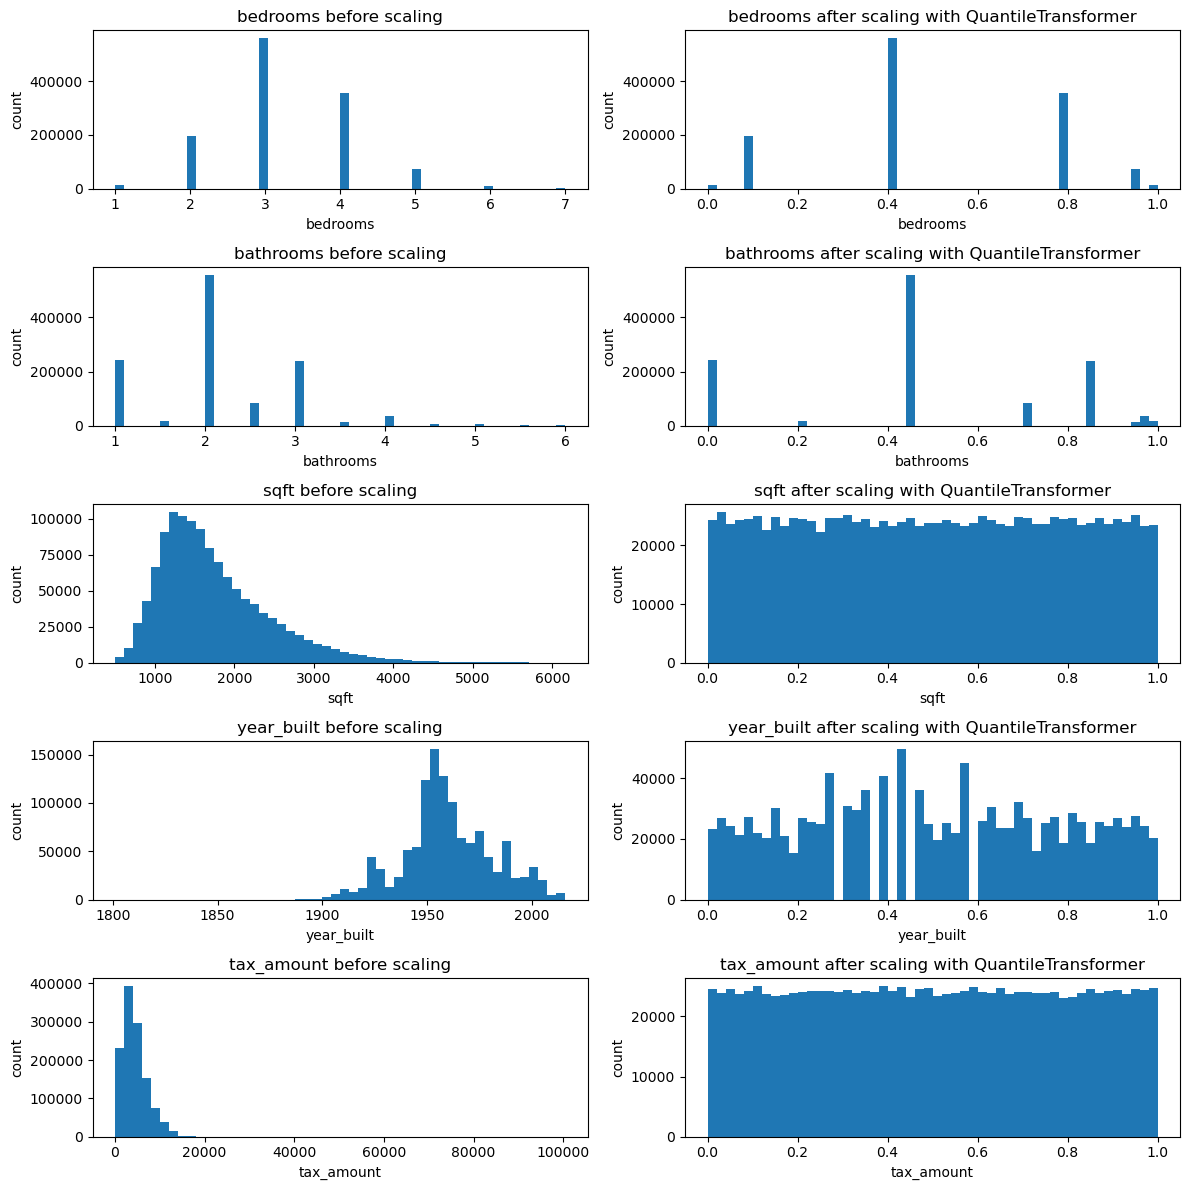

In [30]:
visualize_scale(scaler=QuantileTransformer(),
               df=train,
               columns_to_scale=to_scale,
               bins=50
               )

#### 5. Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

In [ ]:
def scale_data(train,
              validate,
              test,
              to_scale):
    # make copies for scaling
    train_scaled = train.copy()
    validate_scaled = validate.copy()
    test_scaled = test.copy()
    
    # Make the thing
    scaler = MinMaxScaler()
    
    #fit the thing
    scaler.fit(train[to_scale])
    
    #use the thing
    train_scaled[to_scale] = scaler.transform(train[to_scale])
    validate_scaled[to_scale] = scaler.transform(validate[to_scale])
    test_scaled[to_scale] = scaler.transform(test[to_scale])
    
    return train_scaled, validate_scaled, test_scaled

In [ ]:
train_scaled, validate_scaled, test_scaled = scale_data(train, validate, test, to_scale)